<a href="https://colab.research.google.com/github/aghapygad336/MENA/blob/master/MENA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import necessary modules
import csv
with open('2015.csv','rt')as f:
  data = csv.reader(f)


In [34]:
pip install pycountry


     |████████████████████████████████| 10.0MB 2.7MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627360 sha256=d3284092e70c55f3fc20f520e4e02c978d010072419745ab4b7843ef29ba2bce
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [44]:
import pandas as pd
import numpy as np
data = pd.read_csv('TDS2017.csv',encoding = "ISO-8859-1", engine = 'python')
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986]


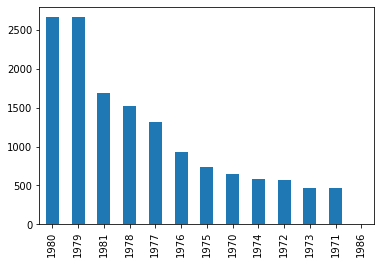

In [52]:
from sklearn.feature_selection import SelectKBest, chi2
data.shape

print(data['iyear'].unique())
class_value = data['iyear'].value_counts()
data['iyear'].value_counts().plot(kind= "bar")
plt.show()
